Estructura del Proyecto
Importación de datos

Carga del dataset y exploración inicial.
Revisión de valores nulos, duplicados, etc.
Análisis Exploratorio de Datos (EDA)

Estadísticas descriptivas (media, mediana, distribución de precios, etc.).
Visualización (distribuciones, mapas de calor, tendencias por temporada).
Preparación de Datos

Limpieza (eliminar outliers, manejar valores nulos).
Codificación de variables categóricas.
Normalización o escalado (si es necesario para modelos).
Análisis y Modelado

Regresión: Predecir precios.
Segmentación: Agrupar propiedades similares (K-Means).
Visualización avanzada: Mapa interactivo con folium para mostrar ubicaciones.
Resultados y Conclusiones

Resumen de hallazgos clave.
Visualizaciones que impacten y sean comprensibles.
Reflexión sobre aplicaciones reales y posibles mejoras.
Presentación del Proyecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

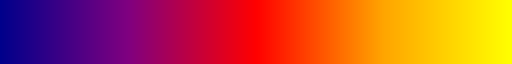

In [2]:
sns.blend_palette(["darkblue","purple","red","orange","yellow"],12,as_cmap=True)

In [3]:
Rp=sns.blend_palette(["darkblue","purple","red","orange","yellow"],12)

In [4]:
Rp

[(0.0, 0.0, 0.5450980392156862),
 (0.18109957708573626, 0.0, 0.5295347943098808),
 (0.3621991541714725, 0.0, 0.5139715494040753),
 (0.5429757785467128, 0.0, 0.46062283737024223),
 (0.730472895040369, 0.0, 0.2716493656286044),
 (0.910157631680123, 0.0, 0.09054978854286816),
 (1.0, 0.11672433679354095, 0.0),
 (1.0, 0.3501730103806228, 0.0),
 (1.0, 0.5937716262975778, 0.0),
 (1.0, 0.7453287197231834, 0.0),
 (1.0, 0.8726643598615917, 0.0),
 (1.0, 1.0, 0.0)]

In [5]:
download_root = "https://raw.githubusercontent.com/CristianRiveraEsparza/MyBDCRE/main/"
airbnb = "AirBnB/listings.csv"
df = pd.read_csv(download_root + airbnb)

In [6]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,0,NaN,NaN,1,363,0,NaN
1,44616,Condesa Haus,196253,Fernando,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,NaN,1,64,2023-03-26,0.41,8,325,0,NaN
2,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,2029.0,2,49,2024-05-05,0.31,2,325,4,NaN


In [7]:
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
26579,1252218347521498445,Suite Queen | District Polanco,596009321,Luis Angel,NaN,Miguel Hidalgo,19.432687,-99.197736,Private room,2600.0,1,0,NaN,NaN,16,177,0,NaN
26580,1252229157495978163,"Pretty, well centered, amenities",6522855,Salvador,NaN,Miguel Hidalgo,19.443476,-99.201748,Entire home/apt,1353.0,1,0,NaN,NaN,4,150,0,NaN
26581,1252932787720304495,w* | Spectacular Loft w/ Perfect View in Roma ...,16148871,Juan,NaN,Cuauhtémoc,19.420141,-99.166998,Entire home/apt,1440.0,1,0,NaN,NaN,148,365,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26582 non-null  int64  
 1   name                            26582 non-null  object 
 2   host_id                         26582 non-null  int64  
 3   host_name                       26582 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26582 non-null  object 
 6   latitude                        26582 non-null  float64
 7   longitude                       26582 non-null  float64
 8   room_type                       26582 non-null  object 
 9   price                           23655 non-null  float64
 10  minimum_nights                  26582 non-null  int64  
 11  number_of_reviews               26582 non-null  int64  
 12  last_review                     

In [9]:
df.count()

,0
id,26582
name,26582
host_id,26582
host_name,26582
neighbourhood_group,0
neighbourhood,26582
latitude,26582
longitude,26582
room_type,26582
price,23655


In [10]:
print(f'Lost data in price row: {df["price"].isna().sum()}, porcent: {df["price"].isna().sum()/df["id"].count()}')
print(f'Lost data in last_review row: {df["last_review"].isna().sum()}, porcent: {df["last_review"].isna().sum()/df["id"].count()}')
print(f'Lost data in reviews_per_month row: {df["reviews_per_month"].isna().sum()}, porcent: {df["reviews_per_month"].isna().sum()/df["id"].count()}')
print(f'Lost data in neighbourhood_group row: {df["neighbourhood_group"].isna().sum()}, porcent: {df["neighbourhood_group"].isna().sum()/df["id"].count()}')
print(f'Lost data in license row: {df["license"].isna().sum()}, porcent: {df["license"].isna().sum()/df["id"].count()}')

Lost data in price row: 2927, porcent: 0.1101121059363479
Lost data in last_review row: 3656, porcent: 0.1375366789556843
Lost data in reviews_per_month row: 3656, porcent: 0.1375366789556843
Lost data in neighbourhood_group row: 26582, porcent: 1.0
Lost data in license row: 26582, porcent: 1.0


In [11]:
df['id'].duplicated().sum()

0

In [12]:
print(df.duplicated().sum())

0


In [13]:
df.drop(columns=['neighbourhood_group','license'], inplace=True)

In [14]:
df[df['price'].isnull()]['neighbourhood'].value_counts()

,count
neighbourhood,
Cuauhtémoc,1034
Miguel Hidalgo,476
Benito Juárez,371
Coyoacán,340
Álvaro Obregón,186
Tlalpan,136
Cuajimalpa de Morelos,86
Venustiano Carranza,70
Iztapalapa,57


In [15]:
missing_data = df.isnull()
coincidence = missing_data['last_review'] & missing_data['reviews_per_month']
coincidence.sum()

3656

In [16]:
df['reviews_per_month'].describe()

,reviews_per_month
count,22926.000000
mean,1.741839
std,1.955753
min,0.010000
25%,0.420000
50%,1.160000
75%,2.460000
max,38.670000


In [17]:
df.drop(columns=['last_review','reviews_per_month'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26582 non-null  int64  
 1   name                            26582 non-null  object 
 2   host_id                         26582 non-null  int64  
 3   host_name                       26582 non-null  object 
 4   neighbourhood                   26582 non-null  object 
 5   latitude                        26582 non-null  float64
 6   longitude                       26582 non-null  float64
 7   room_type                       26582 non-null  object 
 8   price                           23655 non-null  float64
 9   minimum_nights                  26582 non-null  int64  
 10  number_of_reviews               26582 non-null  int64  
 11  calculated_host_listings_count  26582 non-null  int64  
 12  availability_365                

In [19]:
df['id'].duplicated().sum()

0

In [20]:
df.drop(columns=['number_of_reviews_ltm'], inplace=True)

Hacer la suma de reviews totales y agregarlas al Df original.
Pensar en predecir precios de casas dependiendo la zona, no en cuanto costaran a futuro
Predecir cuantas veces una casa sera rentada
Clasificar el tipo de casa dependiendo la zona

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26582 non-null  int64  
 1   name                            26582 non-null  object 
 2   host_id                         26582 non-null  int64  
 3   host_name                       26582 non-null  object 
 4   neighbourhood                   26582 non-null  object 
 5   latitude                        26582 non-null  float64
 6   longitude                       26582 non-null  float64
 7   room_type                       26582 non-null  object 
 8   price                           23655 non-null  float64
 9   minimum_nights                  26582 non-null  int64  
 10  number_of_reviews               26582 non-null  int64  
 11  calculated_host_listings_count  26582 non-null  int64  
 12  availability_365                

In [22]:
df = df.dropna(subset=['price'])

In [23]:
print((df['price']==0).sum(), df["price"].value_counts().get(0, 0))

1 1


In [24]:
df = df.drop(df[df['price'] == 0].index)

In [25]:
df.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.365400e+04,2.365400e+04,23654.00,23654.00,23654.00,23654.00,23654.00,23654.00,23654.00
mean,5.563921e+17,2.192617e+08,19.41,-99.17,1511.71,3.77,49.09,18.25,239.17
std,4.890920e+17,1.860688e+08,0.04,0.03,5059.81,16.87,77.84,42.72,113.96
min,3.579700e+04,7.365000e+03,19.18,-99.34,50.00,1.00,0.00,1.00,0.00
25%,4.165868e+07,5.099941e+07,19.39,-99.18,600.25,1.00,4.00,1.00,145.00
50%,7.052103e+17,1.600126e+08,19.42,-99.17,999.00,2.00,19.00,4.00,268.00
75%,1.005859e+18,3.839779e+08,19.43,-99.15,1564.00,2.00,62.00,12.00,343.00
max,1.252933e+18,6.535037e+08,19.55,-98.97,435481.00,730.00,1282.00,258.00,365.00


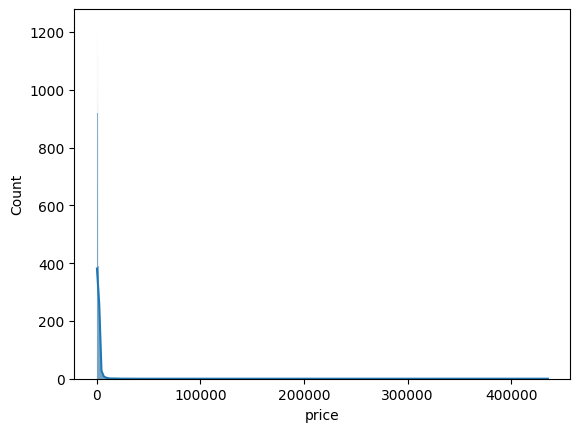

In [26]:
sns.histplot(df['price'], kde=True)
plt.show()

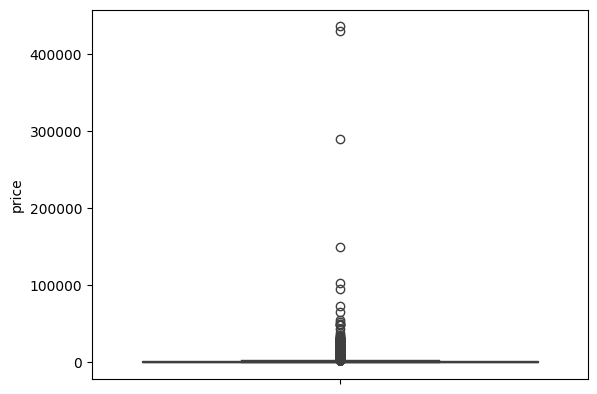

In [27]:
sns.boxplot(df['price'])
plt.show()

In [28]:
print(f'neighbourhood count: {df["neighbourhood"].value_counts()}, \n \nroom type count: {df["room_type"].value_counts()} ')

neighbourhood count: neighbourhood
Cuauhtémoc                11197
Miguel Hidalgo             4057
Benito Juárez              2781
Coyoacán                   1379
Álvaro Obregón              888
Tlalpan                     676
Venustiano Carranza         664
Gustavo A. Madero           470
Iztacalco                   362
Cuajimalpa de Morelos       356
Azcapotzalco                316
Iztapalapa                  209
Xochimilco                  120
La Magdalena Contreras      114
Tláhuac                      43
Milpa Alta                   22
Name: count, dtype: int64, 
 
room type count: room_type
Entire home/apt    15936
Private room        7254
Shared room          376
Hotel room            88
Name: count, dtype: int64 


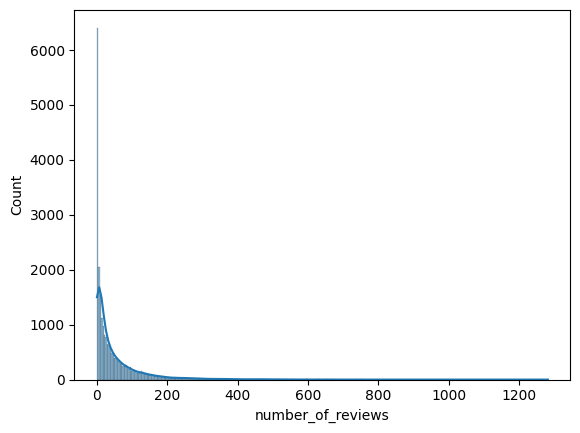

In [29]:
sns.histplot(df['number_of_reviews'], kde=True)
plt.show()

<ipython-input-30-d6c422820034>:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g=sns.countplot(x='room_type', data=df, palette=Rp, hue='room_type')


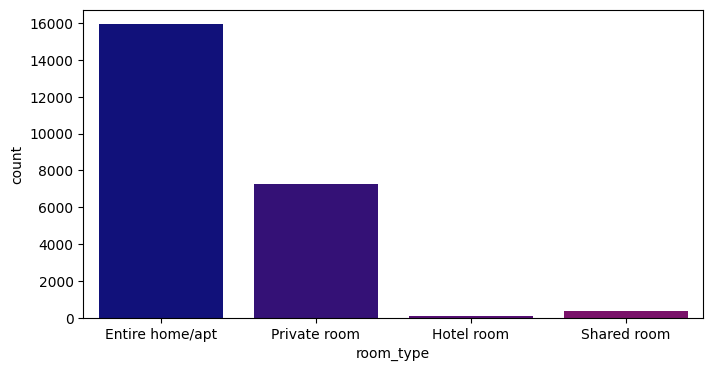

In [30]:
plt.figure(figsize=(8,4))
g=sns.countplot(x='room_type', data=df, palette=Rp, hue='room_type')
plt.show()

<ipython-input-31-b00faae7b9e2>:2: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g=sns.countplot(x='neighbourhood', data=df, palette=Rp, hue='neighbourhood')


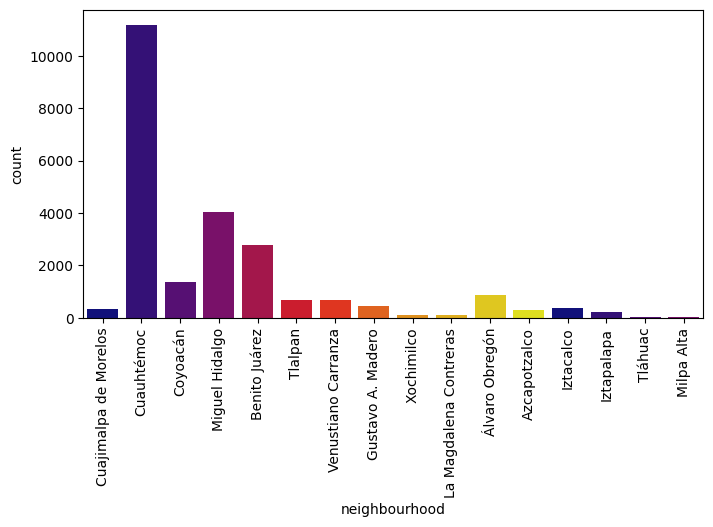

In [31]:
plt.figure(figsize=(8,4))
g=sns.countplot(x='neighbourhood', data=df, palette=Rp, hue='neighbourhood')
plt.xticks(rotation=90)
plt.show()

<ipython-input-32-43fc107a9248>:2: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g=sns.catplot(data=df, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')


<Figure size 1500x700 with 0 Axes>

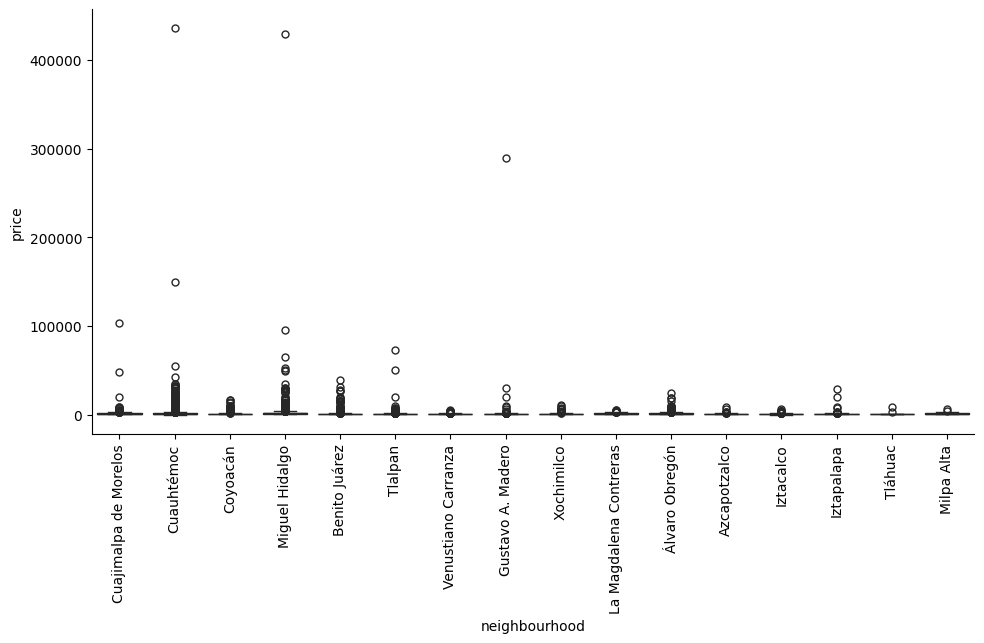

In [32]:
plt.figure(figsize=(15,7))
g=sns.catplot(data=df, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')
plt.xticks(rotation=90)
plt.show()

<ipython-input-33-2cc4d84a5537>:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g=sns.catplot(data=df, x='room_type', y='price', kind='box', aspect=2, palette=Rp, hue='room_type')


<Figure size 1500x700 with 0 Axes>

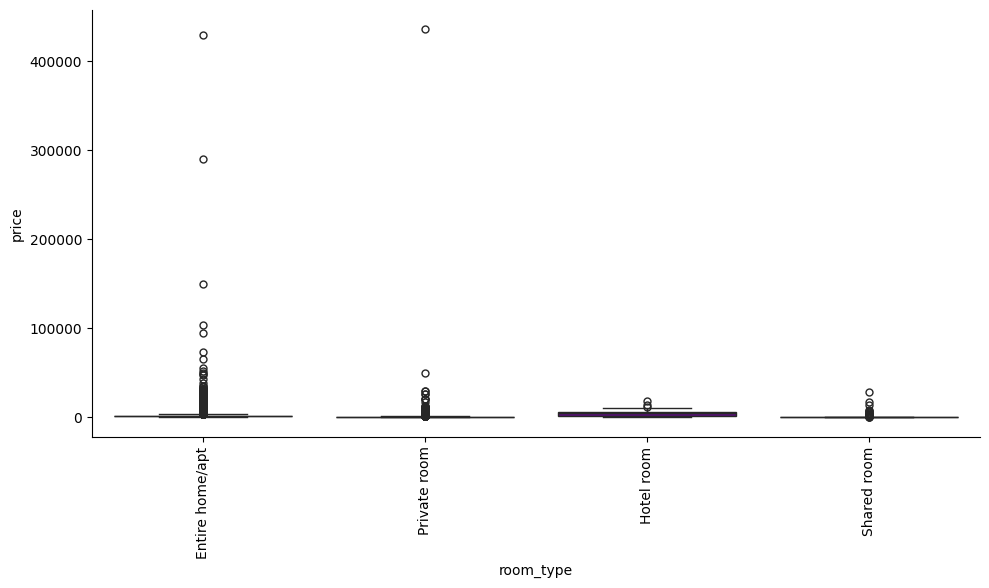

In [33]:
plt.figure(figsize=(15,7))
g=sns.catplot(data=df, x='room_type', y='price', kind='box', aspect=2, palette=Rp, hue='room_type')
plt.xticks(rotation=90)
plt.show()

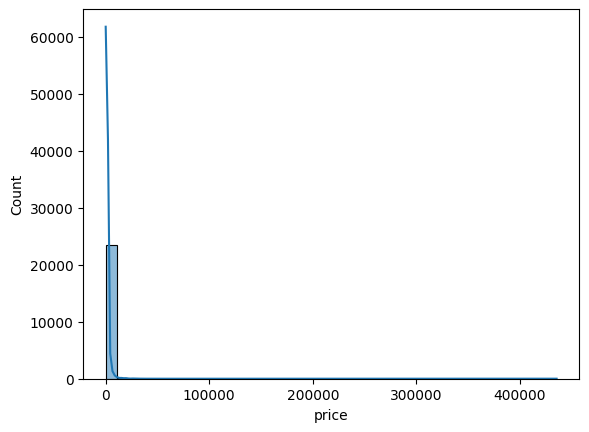

In [34]:
sns.histplot(df['price'], kde=True, bins=40)
plt.show()

In [35]:
print(f'Mean: {df["price"].mean()}, Median: {df["price"].median()}')

Mean: 1511.7123108142387, Median: 999.0


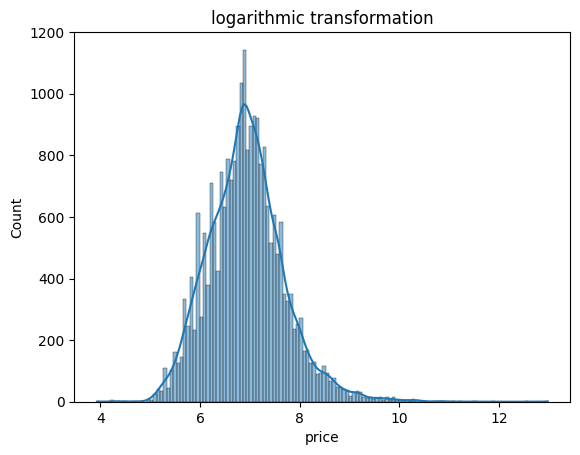

In [36]:
df_temporal = np.log(df['price'] + 1)
df_temporal = pd.DataFrame(df_temporal, columns=['price']) # Convert to DataFrame and assign column name
df_temporal = df_temporal.reset_index(drop=True)
sns.histplot(df_temporal['price'], kde=True)
plt.title('logarithmic transformation')
plt.show()

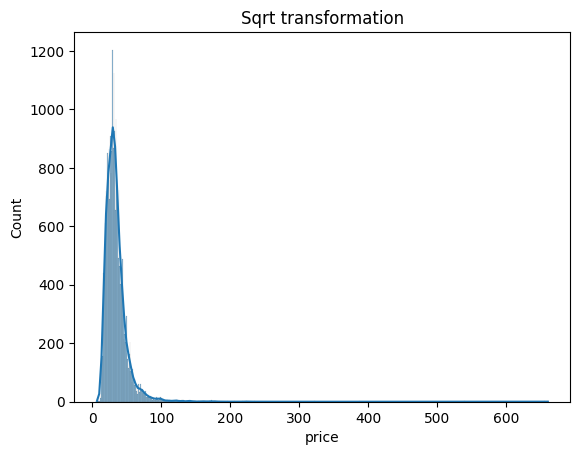

In [37]:
df_temporal = np.sqrt(df['price'])
df_temporal = pd.DataFrame(df_temporal, columns=['price']) # Convert to DataFrame and assign column name
df_temporal = df_temporal.reset_index(drop=True)
sns.histplot(df_temporal['price'], kde=True)
plt.title('Sqrt transformation')
plt.show()

In [38]:
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,0,1,363


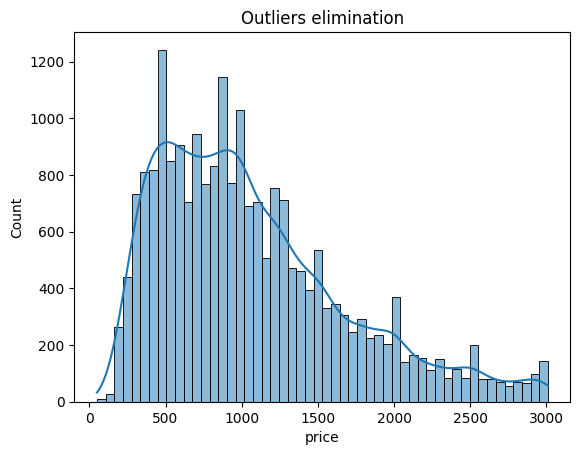

In [39]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
df_temporal = df[df['price'] <= limite_superior]
sns.histplot(df_temporal['price'], kde=True)
plt.title('Outliers elimination')
plt.show()

In [40]:
df_temporal['price'].describe()

,price
count,21933.000000
mean,1067.383076
std,622.089269
min,50.000000
25%,590.000000
50%,947.000000
75%,1400.000000
max,3009.000000


In [41]:
df['price'].describe()

,price
count,23654.000000
mean,1511.712311
std,5059.805252
min,50.000000
25%,600.250000
50%,999.000000
75%,1564.000000
max,435481.000000


In [42]:
df_temporal=df[df['price']>limite_superior]

In [43]:
df_temporal['price'].describe()

,price
count,1721.000000
mean,7174.392795
std,17678.525612
min,3010.000000
25%,3540.000000
50%,4500.000000
75%,6500.000000
max,435481.000000


In [44]:
df_temporal=df_temporal[df_temporal['price']>=6500]
df_temporal=df_temporal.sort_values(by='price', ascending=False)

In [45]:
df_temporal['price'].describe()

,price
count,432.00000
mean,16076.81250
std,33743.05006
min,6500.00000
25%,7663.50000
50%,9661.00000
75%,14900.00000
max,435481.00000


In [46]:
import folium

# Crear mapa centrado en CDMX
mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=12)

# Añadir marcadores de outliers
for idx, row in df_temporal.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Precio: ${row['price']} - Tipo: {row['room_type']}",
        icon=folium.Icon(color='red')
    ).add_to(mapa)

mapa.save('outliers_cdmx_temporal_1.html')

In [47]:
df_mean=df_temporal.groupby('neighbourhood')['price'].mean().reset_index()
df_mean.rename(columns={'price':'mean_price'}, inplace=True)
df_mean

,neighbourhood,mean_price
0,Azcapotzalco,9000.000000
1,Benito Juárez,14105.612903
2,Coyoacán,10644.153846
3,Cuajimalpa de Morelos,29132.857143
4,Cuauhtémoc,14528.942149
5,Gustavo A. Madero,60648.333333
6,Iztacalco,6836.000000
7,Iztapalapa,16302.250000
8,Miguel Hidalgo,18250.830000
9,Milpa Alta,6700.000000


In [48]:
df_temporal=df_temporal.merge(df_mean, on='neighbourhood', how='left')
df_temporal['diference_%']=((df_temporal['price']/df_temporal['mean_price']-1)*100).round(2)
print(df_temporal[['neighbourhood', 'price', 'mean_price', 'diference_%']].sort_values('diference_%', ascending=False))

             neighbourhood     price    mean_price  diference_%
0               Cuauhtémoc  435481.0  14528.942149      2897.33
1           Miguel Hidalgo  429081.0  18250.830000      2251.02
3               Cuauhtémoc  150000.0  14528.942149       932.42
5           Miguel Hidalgo   95000.0  18250.830000       420.52
2        Gustavo A. Madero  289842.0  60648.333333       377.91
..                     ...       ...           ...          ...
307  Cuajimalpa de Morelos    7857.0  29132.857143       -73.03
314  Cuajimalpa de Morelos    7777.0  29132.857143       -73.31
230      Gustavo A. Madero    9449.0  60648.333333       -84.42
297      Gustavo A. Madero    8000.0  60648.333333       -86.81
415      Gustavo A. Madero    6599.0  60648.333333       -89.12

[432 rows x 4 columns]


In [49]:
df_temporal.head(30)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,mean_price,diference_%
0,24020942,Cozy B&B Roma Norte Room 2 con desayuno,176362944,Cesar,Cuauhtémoc,19.423950,-99.156560,Private room,435481.0,2,3,3,157,14528.942149,2897.33
1,1176118239821729583,Pequeño loft en las Lomas,137132393,Rodrigo,Miguel Hidalgo,19.419203,-99.216031,Entire home/apt,429081.0,1,4,14,86,18250.830000,2251.02
2,559360831111324495,Light filled apt center of La Condesa/FiberOptics,444486238,Ben,Gustavo A. Madero,19.549060,-99.153880,Entire home/apt,289842.0,3,3,2,179,60648.333333,377.91
3,52691395,Departamento de 2 pisos en condesa con Roof top,4401504,Adolfo,Cuauhtémoc,19.405080,-99.170990,Entire home/apt,150000.0,365,31,1,364,14528.942149,932.42
4,812542373138725094,Stunning Film/TV Production Site,4953229,Ira,Cuajimalpa de Morelos,19.331181,-99.326523,Entire home/apt,103515.0,1,0,1,365,29132.857143,255.32
5,50303900,"Amazing Apartment Monte Athos, Lomas Chapultepec",137132393,Rodrigo,Miguel Hidalgo,19.420050,-99.215180,Entire home/apt,95000.0,4,24,14,32,18250.830000,420.52
6,556592616972927168,Departamento al sur d Ciudad de México UnamPer...,155943365,Jony,Tlalpan,19.284810,-99.195480,Entire home/apt,73393.0,1,0,1,365,22590.250000,224.89
7,30043309,Rombo IV,207171317,Casa,Miguel Hidalgo,19.401665,-99.254776,Entire home/apt,65000.0,2,1,2,364,18250.830000,256.15
8,31444436,No activo,107194368,Cristina,Cuauhtémoc,19.429420,-99.171700,Entire home/apt,55000.0,2,0,1,178,14528.942149,278.55
9,36799468,Casa Rombo II,207171317,Casa,Miguel Hidalgo,19.401090,-99.254190,Entire home/apt,52200.0,1,0,2,365,18250.830000,186.01


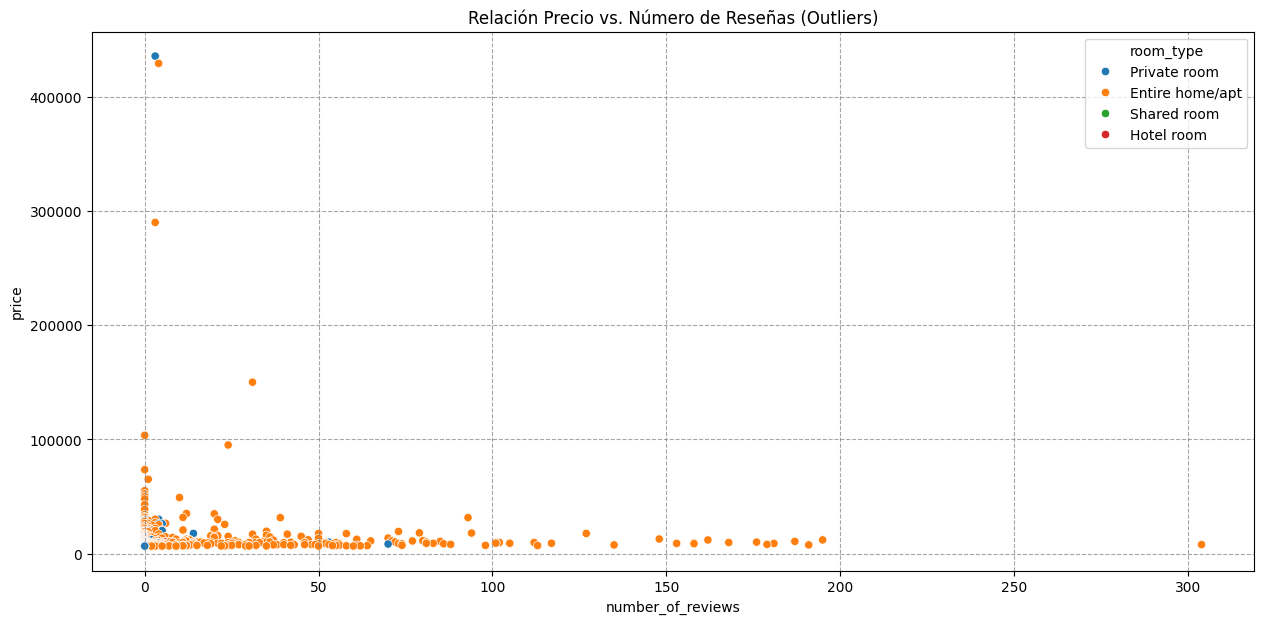

In [50]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df_temporal, hue='room_type')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.title('Relación Precio vs. Número de Reseñas (Outliers)')
plt.show()

<ipython-input-51-42f5fca31f8e>:2: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  g=sns.catplot(data=df_temporal, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')


<Figure size 1500x700 with 0 Axes>

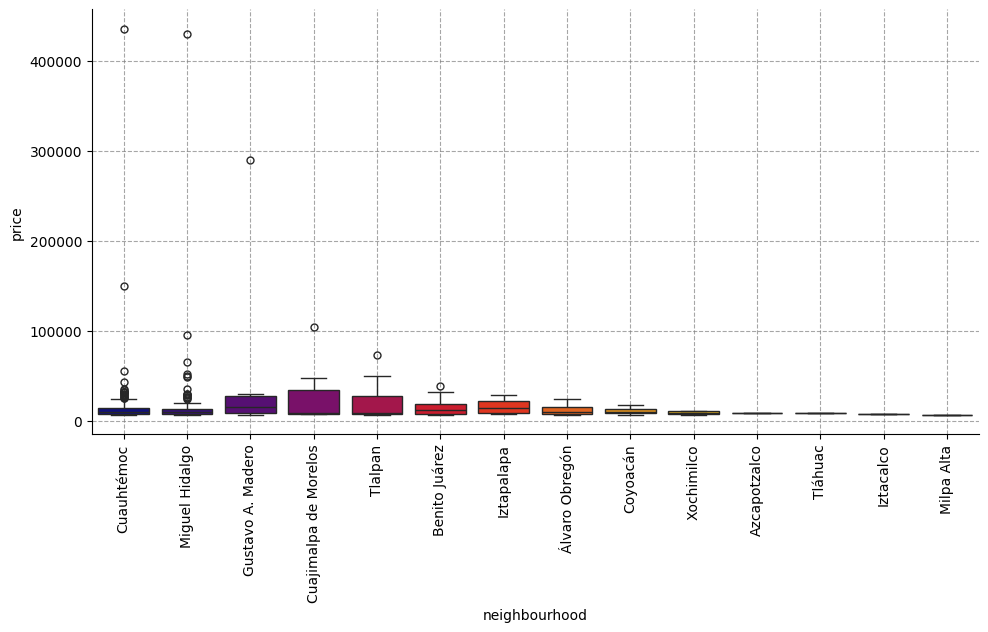

In [51]:
plt.figure(figsize=(15,7))
g=sns.catplot(data=df_temporal, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')
g.ax.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

<ipython-input-52-2d7700f1ff2a>:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g=sns.catplot(data=df_temporal, x='room_type', y='price', kind='box', aspect=2, palette=Rp, hue='room_type')


<Figure size 1500x700 with 0 Axes>

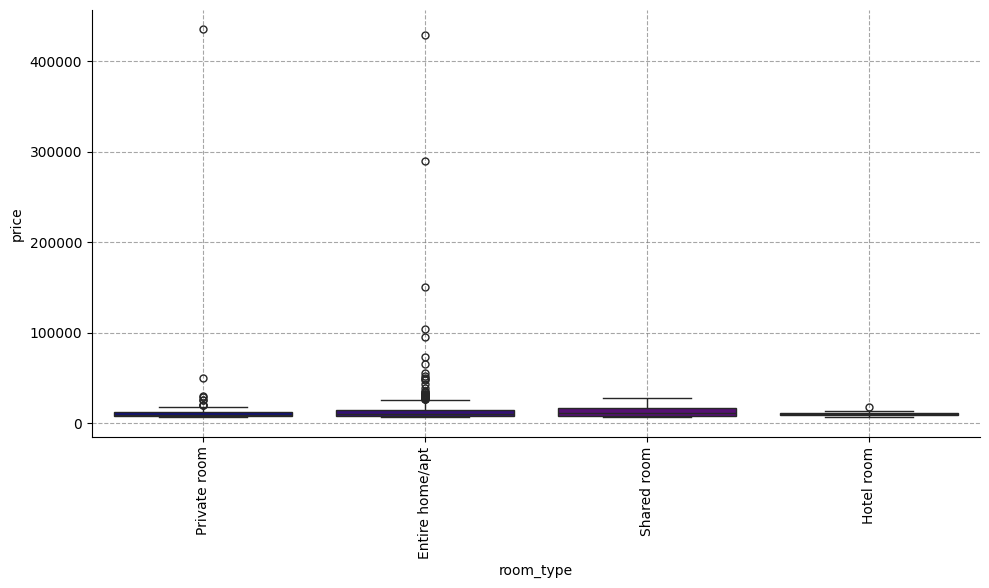

In [52]:
plt.figure(figsize=(15,7))
g=sns.catplot(data=df_temporal, x='room_type', y='price', kind='box', aspect=2, palette=Rp, hue='room_type')
g.ax.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

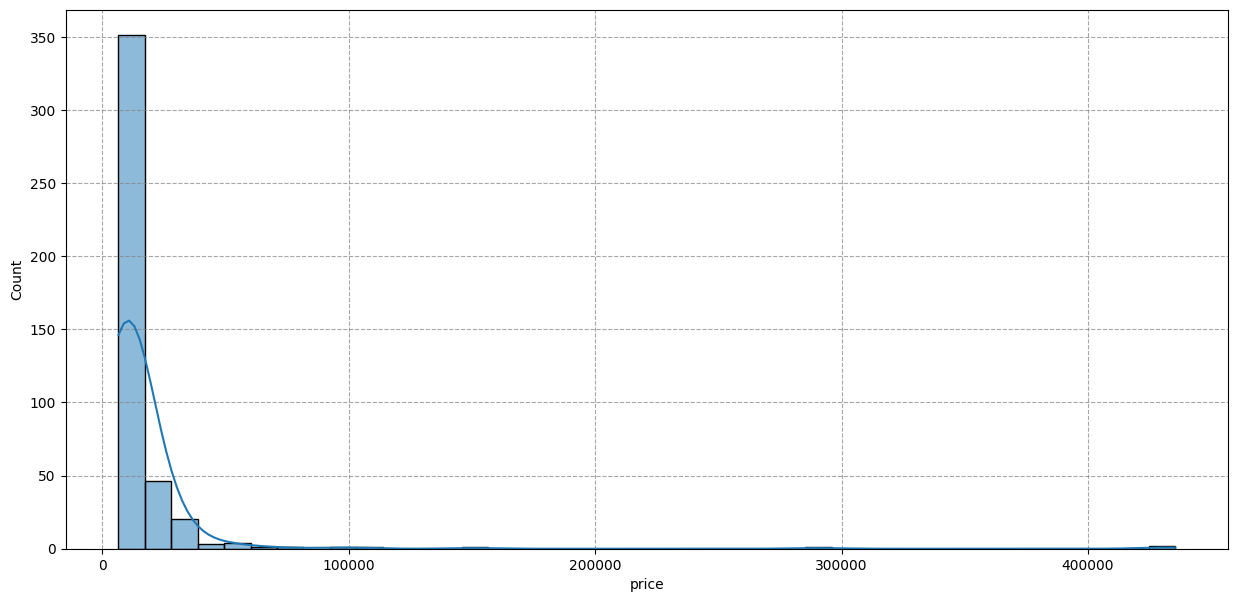

In [53]:
plt.figure(figsize=(15,7))
g=sns.histplot(data=df_temporal, x='price', kde=True, bins=40)
g.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

In [54]:
df_max_outliers=df_temporal[df_temporal['price']>=90000]
df_max_outliers=df_max_outliers.sort_values(by='price', ascending=False)

In [55]:
df_max_outliers['price'].describe()

,price
count,6.000000
mean,250486.500000
std,157189.074695
min,95000.000000
25%,115136.250000
50%,219921.000000
75%,394271.250000
max,435481.000000


In [56]:
df_max_outliers

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,mean_price,diference_%
0,24020942,Cozy B&B Roma Norte Room 2 con desayuno,176362944,Cesar,Cuauhtémoc,19.423950,-99.156560,Private room,435481.0,2,3,3,157,14528.942149,2897.33
1,1176118239821729583,Pequeño loft en las Lomas,137132393,Rodrigo,Miguel Hidalgo,19.419203,-99.216031,Entire home/apt,429081.0,1,4,14,86,18250.830000,2251.02
2,559360831111324495,Light filled apt center of La Condesa/FiberOptics,444486238,Ben,Gustavo A. Madero,19.549060,-99.153880,Entire home/apt,289842.0,3,3,2,179,60648.333333,377.91
3,52691395,Departamento de 2 pisos en condesa con Roof top,4401504,Adolfo,Cuauhtémoc,19.405080,-99.170990,Entire home/apt,150000.0,365,31,1,364,14528.942149,932.42
4,812542373138725094,Stunning Film/TV Production Site,4953229,Ira,Cuajimalpa de Morelos,19.331181,-99.326523,Entire home/apt,103515.0,1,0,1,365,29132.857143,255.32
5,50303900,"Amazing Apartment Monte Athos, Lomas Chapultepec",137132393,Rodrigo,Miguel Hidalgo,19.420050,-99.215180,Entire home/apt,95000.0,4,24,14,32,18250.830000,420.52


In [57]:
# Crear mapa centrado en CDMX
mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=12)

# Añadir marcadores de outliers
for idx, row in df_max_outliers.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Precio: ${row['price']} - Tipo: {row['room_type']}",
        icon=folium.Icon(color='red')
    ).add_to(mapa)

mapa.save('outliers_cdmx_temporal_2.html')

In [58]:
df_temporal=df_temporal[df_temporal['price']<90000]

In [59]:
df_temporal['price'].describe()

,price
count,426.000000
mean,12775.267606
std,8793.158698
min,6500.000000
25%,7635.000000
50%,9661.000000
75%,14489.000000
max,73393.000000


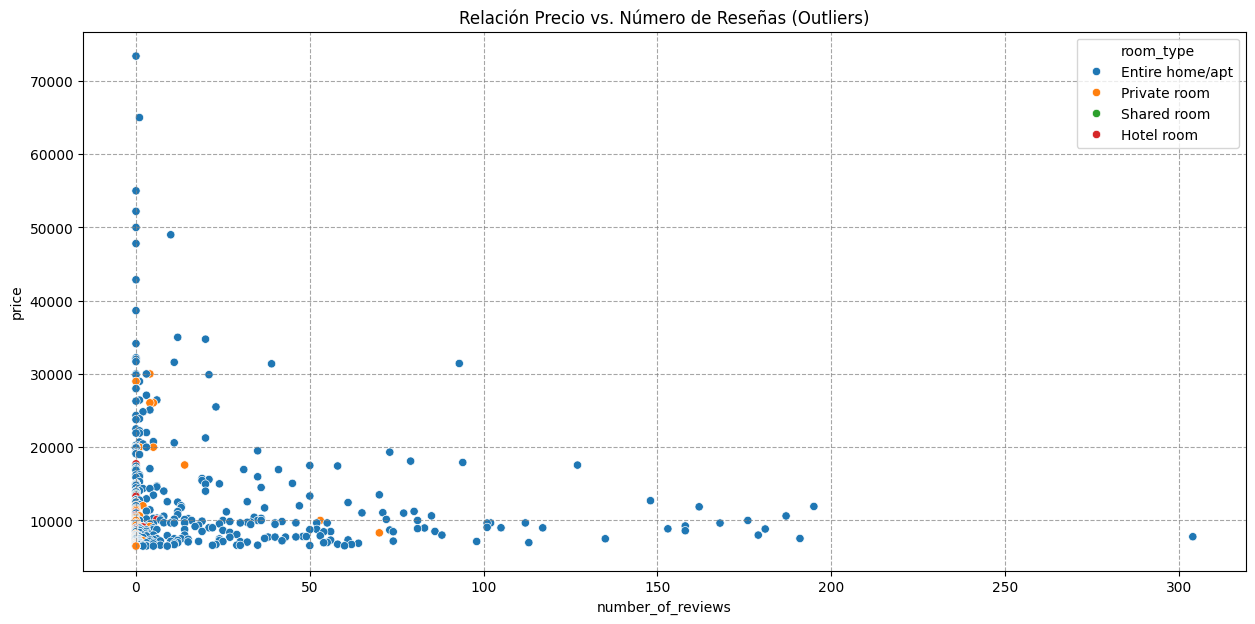

In [60]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df_temporal, hue='room_type')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.title('Relación Precio vs. Número de Reseñas (Outliers)')
plt.show()

In [61]:
df_temporal[df_temporal['number_of_reviews']==0]['price'].describe()

,price
count,150.000000
mean,14595.526667
std,11137.637904
min,6500.000000
25%,7523.500000
50%,10307.500000
75%,16963.500000
max,73393.000000


In [62]:
df_max_outliers=df_temporal[df_temporal['price']>35000]
df_max_outliers=df_max_outliers.sort_values(by='price', ascending=False)

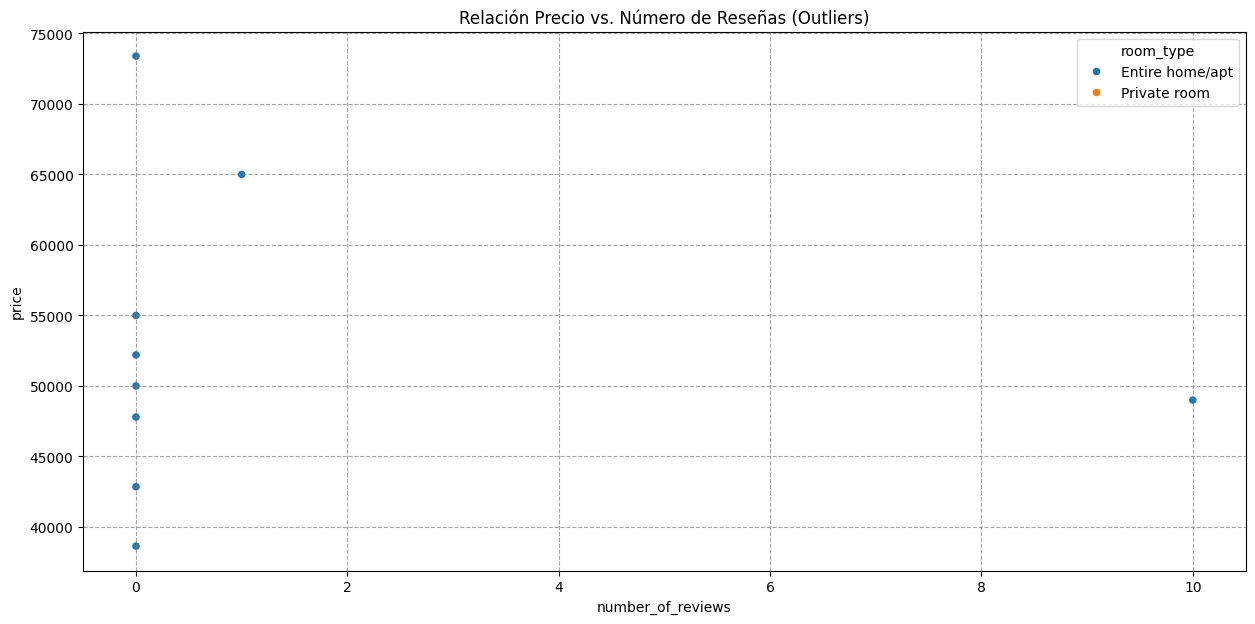

In [63]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df_max_outliers, hue='room_type')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.title('Relación Precio vs. Número de Reseñas (Outliers)')
plt.show()

In [64]:
df_max_outliers

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,mean_price,diference_%
6,556592616972927168,Departamento al sur d Ciudad de México UnamPer...,155943365,Jony,Tlalpan,19.284810,-99.195480,Entire home/apt,73393.0,1,0,1,365,22590.250000,224.89
7,30043309,Rombo IV,207171317,Casa,Miguel Hidalgo,19.401665,-99.254776,Entire home/apt,65000.0,2,1,2,364,18250.830000,256.15
8,31444436,No activo,107194368,Cristina,Cuauhtémoc,19.429420,-99.171700,Entire home/apt,55000.0,2,0,1,178,14528.942149,278.55
9,36799468,Casa Rombo II,207171317,Casa,Miguel Hidalgo,19.401090,-99.254190,Entire home/apt,52200.0,1,0,2,365,18250.830000,186.01
10,25873990,Rancho Guadalupe Ajusco Riding Holidays,100815374,Olga&Perico,Tlalpan,19.214610,-99.195750,Private room,50000.0,2,0,1,69,22590.250000,121.33
11,1171687638662203439,Luxurious Apartment City Centre CDMX,89306622,Cédric Adrian,Miguel Hidalgo,19.429591,-99.176424,Entire home/apt,49999.0,1,0,1,270,18250.830000,173.95
12,29217617,"DEPTO COMPLETO GRANDE ZONA POLANCO, ANAHUAC I ...",220137622,Alicia,Miguel Hidalgo,19.442430,-99.181880,Entire home/apt,49000.0,3,10,1,365,18250.830000,168.48
13,1196285776211239613,Casa en el corazón de bosques,6504552,Barbara,Cuajimalpa de Morelos,19.387306,-99.257389,Entire home/apt,47800.0,1,0,3,269,29132.857143,64.08
14,1179196519229213225,Santa Casa by Tasman,352959504,Jaco,Cuauhtémoc,19.415525,-99.162577,Entire home/apt,42857.0,2,0,18,206,14528.942149,194.98
15,51799961,Espacio ÚNICO en la Del Valle,103629467,Marco,Benito Juárez,19.374230,-99.174410,Entire home/apt,38646.0,90,0,1,180,14105.612903,173.98


In [65]:
df_temporal=df_temporal[df_temporal['price']<43000]

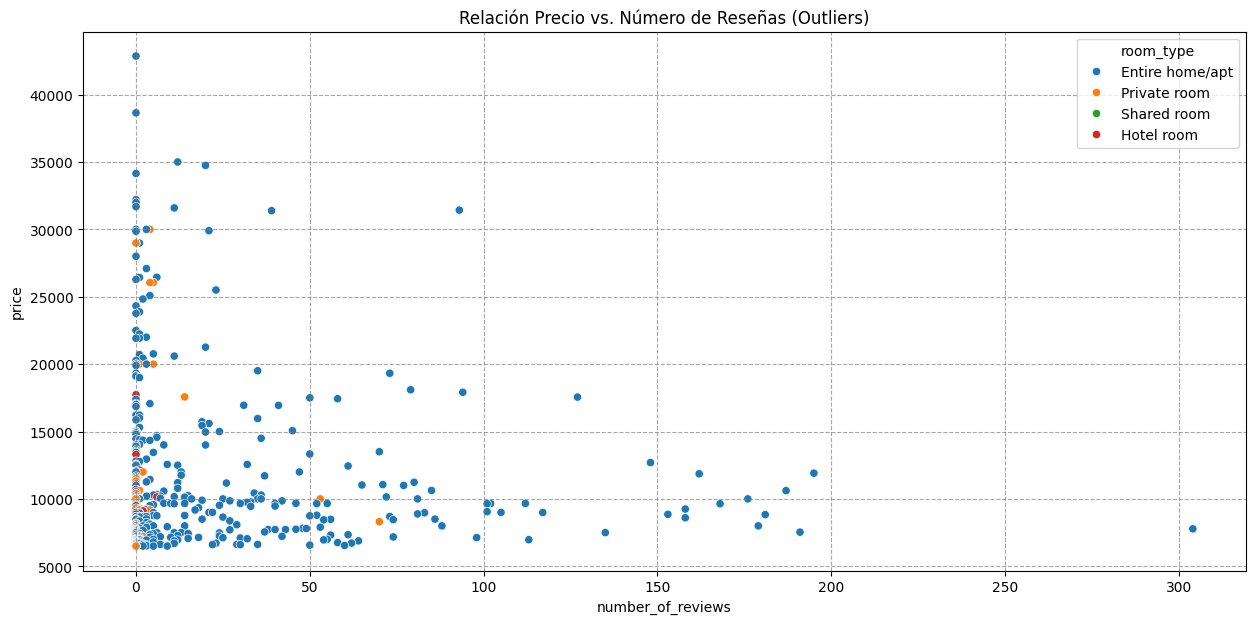

In [66]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df_temporal, hue='room_type')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.title('Relación Precio vs. Número de Reseñas (Outliers)')
plt.show()

In [67]:
df[df['price']>43000]['price'].count()

14

In [68]:
df[df['price']<43000]['price'].describe()

,price
count,23640.000000
mean,1430.318613
std,1909.565124
min,50.000000
25%,600.000000
50%,999.000000
75%,1561.000000
max,42857.000000


In [69]:
df=df[df['price']<43000]

In [70]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,0,1,363
2,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,2029.0,2,49,2,325
3,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacán,19.35614,-99.16308,Entire home/apt,1140.0,5,127,3,257
4,107078,NEW DESIGNER LOFT,540705,Andrea,Miguel Hidalgo,19.43211,-99.19327,Entire home/apt,3633.0,1,11,3,275
6,165772,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,790208,Francisco Carlos,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3671.0,2,357,7,230


In [71]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.364000e+04,2.364000e+04,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000
mean,5.564901e+17,2.193070e+08,19.406301,-99.166222,1430.318613,3.759729,49.119332,18.260406,239.169036
std,4.890761e+17,1.860953e+08,0.041710,0.032586,1909.565124,16.713203,77.859946,42.734596,113.960088
min,3.579700e+04,7.365000e+03,19.177848,-99.339630,50.000000,1.000000,0.000000,1.000000,0.000000
25%,4.166626e+07,5.099606e+07,19.393877,-99.178748,600.000000,1.000000,4.000000,1.000000,145.000000
50%,7.052580e+17,1.600891e+08,19.415610,-99.167519,999.000000,2.000000,19.000000,4.000000,268.000000
75%,1.005885e+18,3.844177e+08,19.432133,-99.154380,1561.000000,2.000000,62.000000,12.000000,343.000000
max,1.252933e+18,6.535037e+08,19.553380,-98.966450,42857.000000,730.000000,1282.000000,258.000000,365.000000


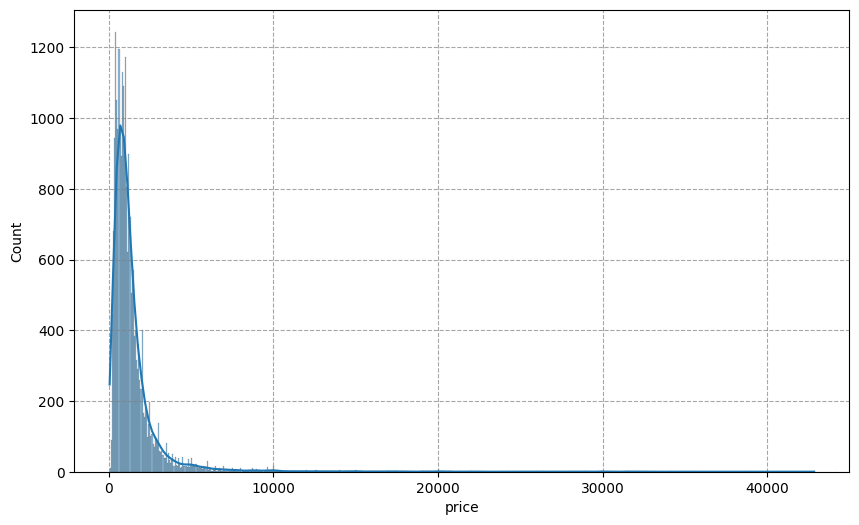

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

<ipython-input-73-cce82b551536>:2: UserWarning: 
The palette list has fewer values (12) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g=sns.catplot(data=df, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')


<Figure size 1000x600 with 0 Axes>

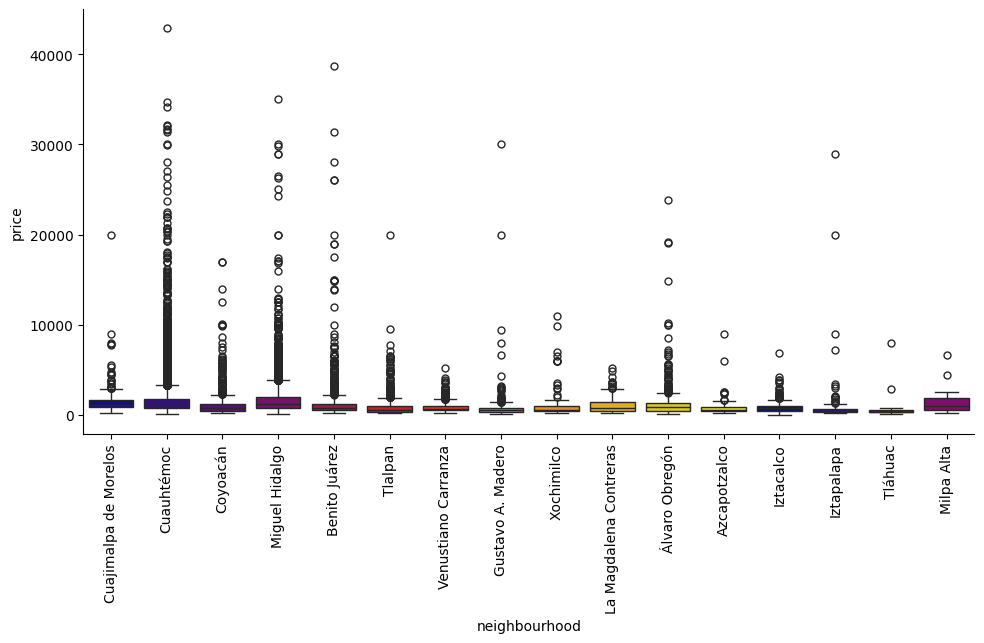

In [73]:
plt.figure(figsize=(10,6))
g=sns.catplot(data=df, x='neighbourhood', y='price', kind='box', aspect=2, palette=Rp, hue='neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [74]:
print(f"Prices under the upper limit:{df[df['price']<limite_superior]['price'].count()}")
print(f"Prices over the upper limit: {df[df['price']>limite_superior]['price'].count()}")
print(f"Low prices: {df[df['price']<=500]['price'].count()}")
print(f"Medium prices: {df[(df['price']>500) & (df['price']<=1500)]['price'].count()}")
print(f"High prices: {df[(df['price']>1500) & (df['price']<=limite_superior)]['price'].count()}")
print(f"Luxury prices: {df[df['price']>limite_superior]['price'].count()}")

Prices under the upper limit:21933
Prices over the upper limit: 1707
Low prices: 4294
Medium prices: 13072
High prices: 4567
Luxury prices: 1707


In [75]:
bins=[0,500,1500,limite_superior, np.inf]
labels=['Low','Medium','High','Luxury']
df_temporal=df.copy()
df_temporal['price_category']=pd.cut(df_temporal['price'], bins=bins, labels=labels, include_lowest=True)

In [76]:
df_temporal.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_category
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,0,1,363,Luxury


In [77]:
df_temporal['price_category'].value_counts()

,count
price_category,
Medium,13072
High,4567
Low,4294
Luxury,1707


In [78]:
df_temporal['price_category'].count()

23640

<ipython-input-79-845a2b495b0a>:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  g=sns.countplot(x='price_category', data=df_temporal, palette=Rp, hue='price_category')


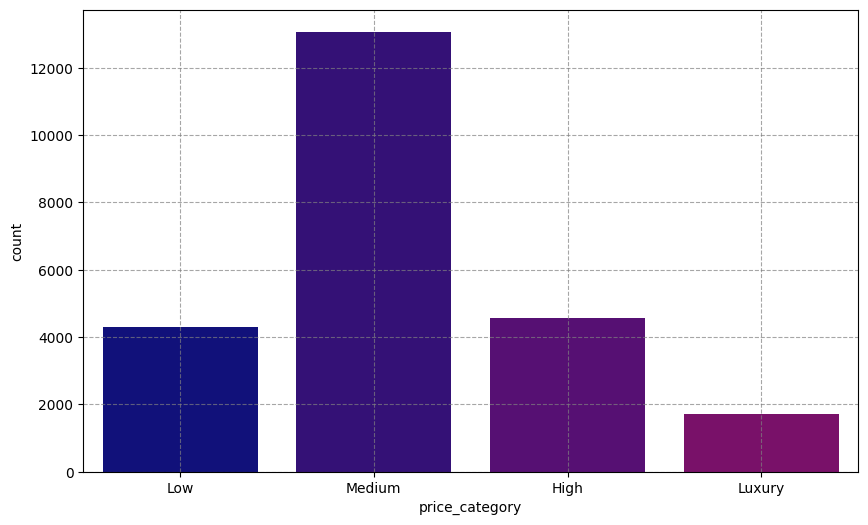

In [79]:
plt.figure(figsize=(10,6))
g=sns.countplot(x='price_category', data=df_temporal, palette=Rp, hue='price_category')
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

In [80]:
df_temporal['logarithmic_price'] = np.log(df_temporal['price'] + 1)

In [81]:
df_temporal.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,logarithmic_price
count,2.364000e+04,2.364000e+04,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000,23640.000000
mean,5.564901e+17,2.193070e+08,19.406301,-99.166222,1430.318613,3.759729,49.119332,18.260406,239.169036,6.925390
std,4.890761e+17,1.860953e+08,0.041710,0.032586,1909.565124,16.713203,77.859946,42.734596,113.960088,0.757578
min,3.579700e+04,7.365000e+03,19.177848,-99.339630,50.000000,1.000000,0.000000,1.000000,0.000000,3.931826
25%,4.166626e+07,5.099606e+07,19.393877,-99.178748,600.000000,1.000000,4.000000,1.000000,145.000000,6.398595
50%,7.052580e+17,1.600891e+08,19.415610,-99.167519,999.000000,2.000000,19.000000,4.000000,268.000000,6.907755
75%,1.005885e+18,3.844177e+08,19.432133,-99.154380,1561.000000,2.000000,62.000000,12.000000,343.000000,7.353722
max,1.252933e+18,6.535037e+08,19.553380,-98.966450,42857.000000,730.000000,1282.000000,258.000000,365.000000,10.665648


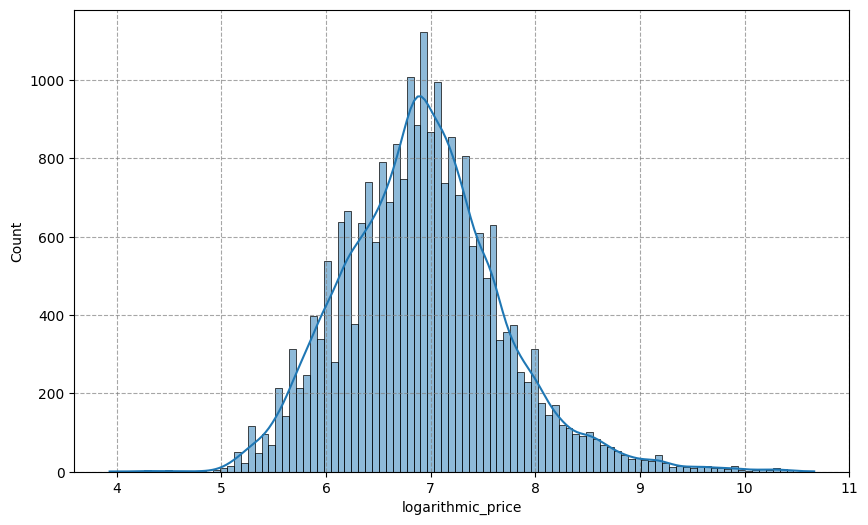

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(df_temporal['logarithmic_price'], kde=True)
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

In [83]:
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,0,1,363
